In [1]:
import config
import modules.dataloaders as data_loaders
import modules.models as models
import modules.utils as utils

import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.11 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


# Datasets

### DFire

In [2]:
dfire_loader = data_loaders.get_dfire_val_loader()


TEST DFire dataset
DFire Removed wrong images: 0
DFire Removed due to overlapping: 310
DFire Removed due to more than 10: 13

Test dataset len: 3983


### FASDD UAV

In [3]:
# fasdd_uav_loader = data_loaders.get_fasdd_uav_val_loader()

### FASDD CV

In [4]:
# fasdd_cv_loader = data_loaders.get_fasdd_cv_val_loader()

### FASDD RS RGB

In [5]:
fasdd_rs_loader = data_loaders.get_fasdd_rs_val_loader()


TEST FASDD RS dataset
FASDD Removed wrong images: 0
FASDD Removed due to overlapping: 19
FASDD Removed due to more than 10: 0

Test FASDD RS dataset len: 351


# Load Model

In [6]:
model = models.BED_DETECTOR().to(config.DEVICE)

### Load Weights

In [7]:
weights_path = './experiments/test_02_dfire_&_fasdd_uav_cv/weights/'
weights_file = weights_path + 'BED_detector__best_mAP=0.6352__epoch=99.pt'

utils.load_checkpoint(
    model_path=weights_file, 
    model=model, 
    optimizer=None, 
    scheduler=None, 
    device=config.DEVICE)

Loading Model. Trained during 99 epochs


99

### Evaluation Mode

In [8]:
model.eval()

BED_DETECTOR(
  (model): Sequential(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (dropout1): Dropout2d(p=0.3, inplace=False)
    (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (dropout2): Dropout2d(p=0.3, inplace=False)
    (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv31): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn31): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu31): ReLU()
    (conv32): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

# Plot Predictions

### View Some Images

In [9]:
fass_rs_batch_idx_chosen = 4

Batch size equal to img.shape[0] = 64
Batch images shape = torch.Size([64, 3, 224, 224])


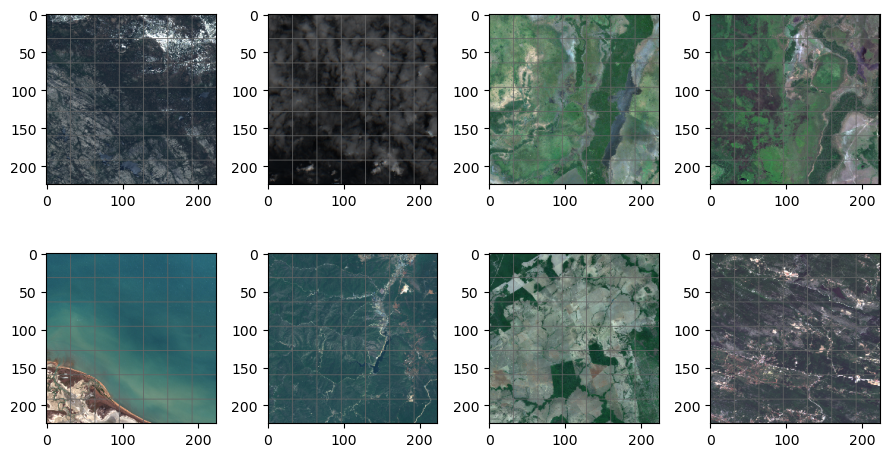

In [10]:
for batch_idx, (img, label) in enumerate(fasdd_rs_loader):
       
    if batch_idx == fass_rs_batch_idx_chosen:
        print(f'Batch size equal to img.shape[0] = {img.shape[0]}')
        print(f'Batch images shape = {img.shape}')
        plt.subplots(2, 4, figsize=(9,5))
        for i in range(8):
            pic = utils.plot_dataset_img(img[i], label[i], grid=True)
            plt.subplot(2, 4, i+1)
            plt.imshow(pic)
        plt.tight_layout()
        plt.show()
        break

## One Picture Prediction RS Dataset

Choose the picture with idx variable.

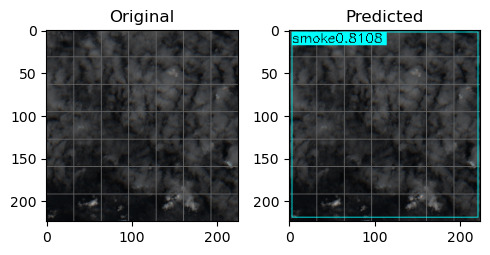

In [11]:
for batch_idx, (img, label) in enumerate(fasdd_rs_loader):
    if batch_idx == fass_rs_batch_idx_chosen:
        idx = 1 # Chosen image from above
        plt.subplots(1, 2, figsize=(5,3))
        
        plt.subplot(1, 2, 1)
        ori_pic = utils.plot_dataset_img(img[idx], label[idx], grid=True)
        plt.title('Original')
        plt.imshow(ori_pic)
        
        plt.subplot(1, 2, 2)
        img_to_model = img[idx].unsqueeze(dim=0).to(config.DEVICE)
        pred_out = model(img_to_model)
        pred_pic = utils.plot_predicted_img(img[idx], pred_out, grid=True)
        plt.title('Predicted')
        plt.imshow(pred_pic)
        
        plt.tight_layout()
        plt.show()
        break

# DFire Dataset

### View Some Images

In [12]:
dfire_batch_idx_chosen = 32

Batch size equal to img.shape[0] = 64
Batch images shape = torch.Size([64, 3, 224, 224])


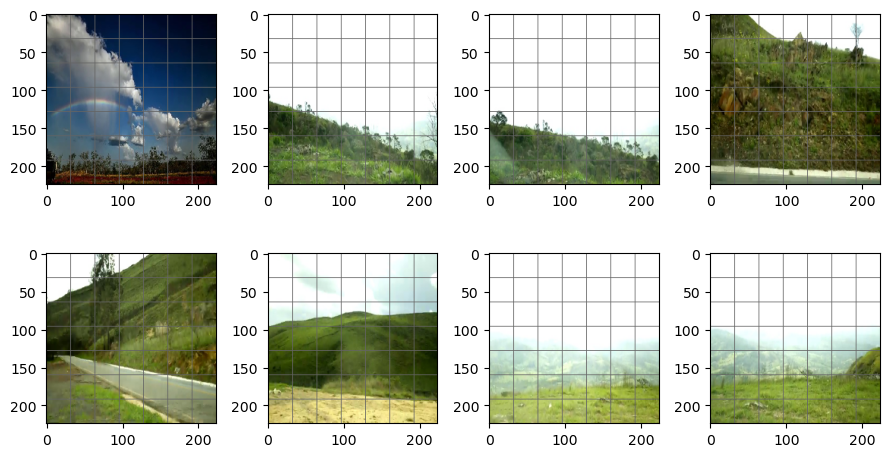

In [13]:
for batch_idx, (img, label) in enumerate(dfire_loader):
       
    if batch_idx == dfire_batch_idx_chosen:
        print(f'Batch size equal to img.shape[0] = {img.shape[0]}')
        print(f'Batch images shape = {img.shape}')
        plt.subplots(2, 4, figsize=(9,5))
        for i in range(8):
            pic = utils.plot_dataset_img(img[i], label[i], grid=True)
            plt.subplot(2, 4, i+1)
            plt.imshow(pic)
        plt.tight_layout()
        plt.show()
        break

## One Picture Prediction DFire Dataset

Choose the picture with idx variable.

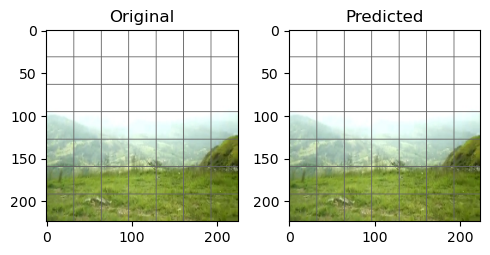

In [14]:
for batch_idx, (img, label) in enumerate(dfire_loader):
    if batch_idx == dfire_batch_idx_chosen:
        idx = 7 # Chosen image from above
        plt.subplots(1, 2, figsize=(5,3))
        
        plt.subplot(1, 2, 1)
        ori_pic = utils.plot_dataset_img(img[idx], label[idx], grid=True)
        plt.title('Original')
        plt.imshow(ori_pic)
        
        plt.subplot(1, 2, 2)
        img_to_model = img[idx].unsqueeze(dim=0).to(config.DEVICE)
        pred_out = model(img_to_model)
        pred_pic = utils.plot_predicted_img(img[idx], pred_out, grid=True)
        plt.title('Predicted')
        plt.imshow(pred_pic)
        
        plt.tight_layout()
        plt.show()
        break